# Name: Omole Adetoyese John

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
! pip install wordcloud

### Reading the data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/notpeter/crunchbase-data/master/companies.csv")

In [4]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [5]:
df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


## 1 - Data preparation

### Checking for Missing Values:

In [7]:
# Check for missing values percentage in the dataset
missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

name                 0.001507
homepage_url         7.621143
category_list        4.743250
country_code        10.483968
state_code          12.878194
region              12.099204
city                12.096191
founded_at          22.934245
first_funding_at     0.036162
dtype: float64

#### Identifies the count of missing values in each column, helping assess data completeness.

#### Funding_total_usd

In [8]:
print(f"The funding total min: {df['funding_total_usd'].max()}")

The funding total min: 9999999


In [9]:
print(f"The funding total min: {df['funding_total_usd'].min()}")

The funding total min: -


Since df[df['funding_total_usd']=='0'] doesn't produce any result. Let assumed that record with "-" are 0 i.e they have no funding.

In [10]:
df.replace('-', 0, inplace=True)

Convert the funding_total_usd to numeric

In [11]:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

#### Founded_at and last_funding_at

In [12]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

In [13]:
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

In [14]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')

#### make sure we don't have an invalid datetime

### Status Distribution:

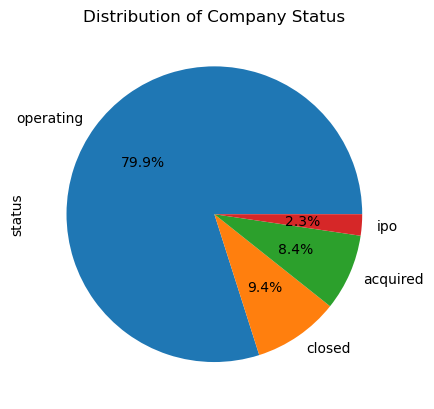

In [15]:
# Pie chart of status distribution
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Company Status')
plt.show()


#### Illustrates the distribution of companies based on their operational status.

### Funding Rounds:

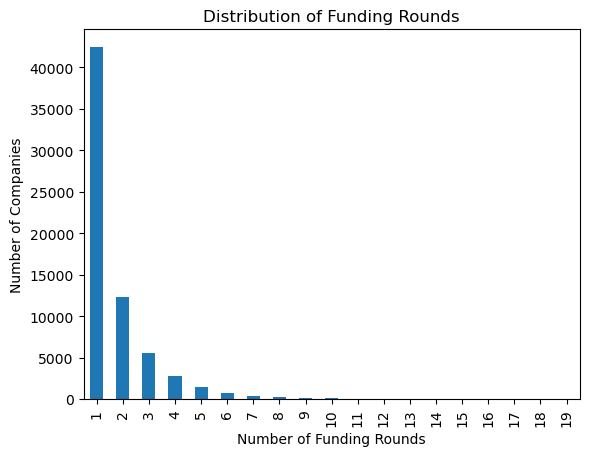

In [16]:
# Bar chart of funding rounds
df['funding_rounds'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Number of Companies')
plt.title('Distribution of Funding Rounds')
plt.show()


#### Displays the distribution of companies based on the number of funding rounds they have undergone.

### Country-wise Analysis:

In [17]:
df_country_total_funding = df.groupby('country_code', as_index=False)['funding_total_usd'].sum().sort_values('funding_total_usd', ascending=False).reset_index(drop=True)
print(f'The top 20 country with highest funding are {df_country_total_funding.head(20)}')

The top 20 country with highest funding are    country_code  funding_total_usd
0           USA       6.694941e+11
1           CHN       7.570357e+10
2           GBR       3.276715e+10
3           IND       2.768634e+10
4           CAN       1.842468e+10
5           RUS       1.127912e+10
6           DEU       1.001776e+10
7           ISR       9.713885e+09
8           FRA       9.059771e+09
9           NLD       5.966633e+09
10          JPN       4.912602e+09
11          ESP       4.729415e+09
12          CHE       4.339276e+09
13          SWE       4.080821e+09
14          SGP       4.068412e+09
15          BRA       3.948570e+09
16          AUS       3.839237e+09
17          KOR       2.838640e+09
18          IRL       2.401611e+09
19          HKG       2.296344e+09


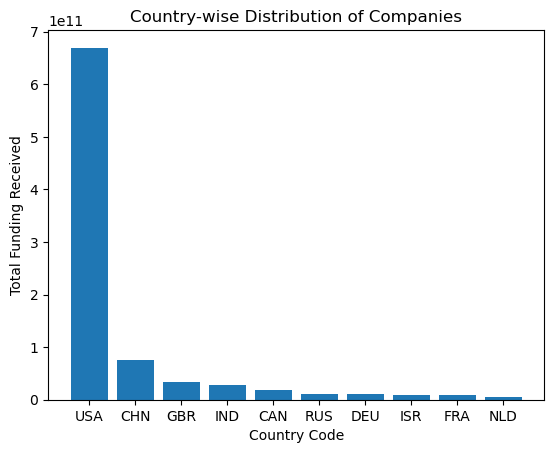

In [18]:
# Bar chart of country-wise company count
plt.bar(df_country_total_funding['country_code'][:10], df_country_total_funding['funding_total_usd'][:10])
plt.xlabel('Country Code')
plt.ylabel('Total Funding Received')
plt.title('Country-wise Distribution of Companies')
plt.show()


#### Shows the distribution of companies across different countries.

### Time Series Analysis:

In [19]:
df_founded = df[(df['founded_at'] >= pd.to_datetime('2000-01-01')) & (df['founded_at']<= datetime.now())]

In [20]:
df_funded = df_founded.set_index('founded_at')['funding_total_usd']
df_funded.head(10)

founded_at
2014-09-04      700000.0
2007-01-01     2000000.0
2010-01-01           0.0
2011-01-01    33600000.0
2011-08-01     1150050.0
2012-01-01       40000.0
2013-12-07           0.0
2013-10-24     6000000.0
2012-03-01     5000000.0
2014-12-01      100000.0
Name: funding_total_usd, dtype: float64

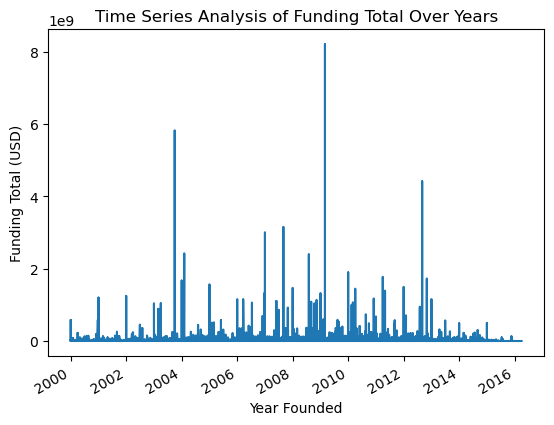

In [21]:
# Time series plot of founded_at
df_funded.plot()
plt.xlabel('Year Founded')
plt.ylabel('Funding Total (USD)')
plt.title('Time Series Analysis of Funding Total Over Years')
plt.show()


#### Visualizes the trend in funding totals for the startup founded after 2000 till now.

### Category-wise Analysis:

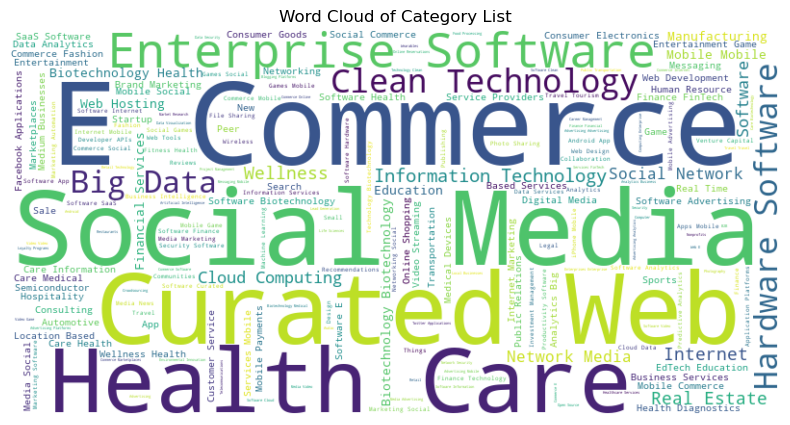

In [22]:
# Word cloud of category_list
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['category_list'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Category List')
plt.show()


#### Creates a word cloud to represent the distribution of categories in the dataset.

## 2- Measuring Central Tendency and Spread

#### Provides summary statistics (mean, median, min, max, etc.) for numeric columns like 'funding_total_usd', 'funding_rounds', etc.

In [32]:
def cds(df, column_name):
    column_data = df[column_name]

    # Central tendency measures
    mean = np.mean(column_data)
    median = np.median(column_data)
    mode = column_data.mode().values[0]

    # Spread measures
    minimum = np.min(column_data)
    maximum = np.max(column_data)
    range_val = maximum - minimum
    quartiles = np.percentile(column_data, [25, 50, 75])
    interquartile_range = quartiles[2] - quartiles[0]
    std_deviation = np.std(column_data)
    variance = np.var(column_data)

    # Construct dictionary of results
    statistics = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Minimum': minimum,
        'Maximum': maximum,
        'Range': range_val,
        'Q1': quartiles[0],
        'Q2': quartiles[1],
        'Q3': quartiles[2],
        'Interquartile Range': interquartile_range,
        'Standard Deviation': std_deviation,
        'Variance': variance
    }
    
    return statistics


In [34]:
print(f"The following are the data measure central tendecy and spread for the funding_total_usd: \n{cds(df, 'funding_total_usd')}")

The following are the data measure central tendecy and spread for the funding_total_usd: 
{'Mean': 14918922.374247737, 'Median': 1000000.0, 'Mode': 0.0, 'Minimum': 0.0, 'Maximum': 30079503000.0, 'Range': 30079503000.0, 'Q1': 40000.0, 'Q2': 1000000.0, 'Q3': 6800473.25, 'Interquartile Range': 6760473.25, 'Standard Deviation': 169091706.5257344, 'Variance': 2.8592005215785084e+16}


In [35]:
print(f"The following are the data measure central tendecy and spread for the funding_rounds: \n{cds(df, 'funding_rounds')}")

The following are the data measure central tendecy and spread for the funding_rounds: 
{'Mean': 1.7325216972034716, 'Median': 1.0, 'Mode': 1, 'Minimum': 1, 'Maximum': 19, 'Range': 18, 'Q1': 1.0, 'Q2': 1.0, 'Q3': 2.0, 'Interquartile Range': 1.0, 'Standard Deviation': 1.360240794867864, 'Variance': 1.8502550200227585}


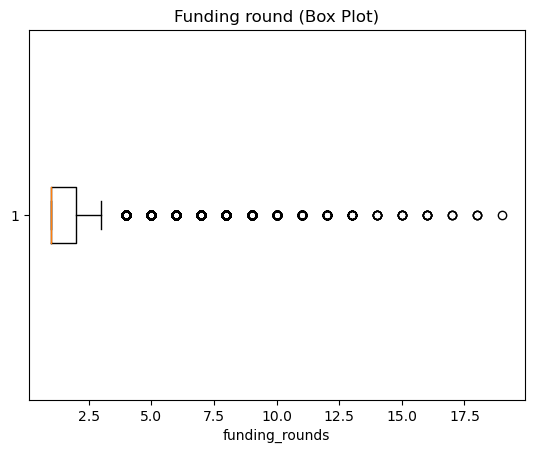

In [36]:
plt.boxplot(df['funding_rounds'], vert=False)
plt.title('Funding round (Box Plot)')
plt.xlabel('funding_rounds')
plt.show()

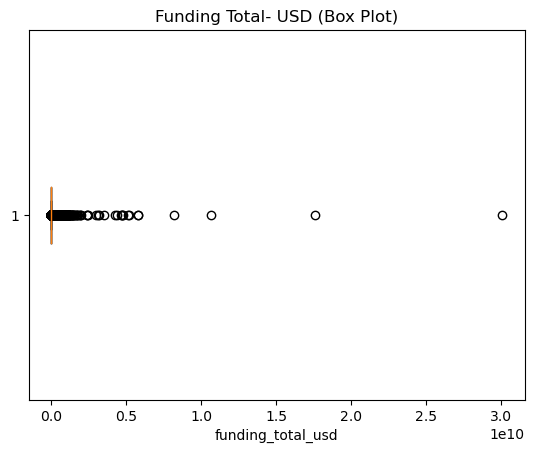

In [37]:
plt.boxplot(df['funding_total_usd'], vert=False)
plt.title('Funding Total- USD (Box Plot)')
plt.xlabel('funding_total_usd')
plt.show()

## 

## Treatment of Outliers

1. Trimming is the method of cutting off or getting rid of the outliers at the end of the dataset. This is easier than all the other methods.
2. Capping is setting a limit for the feature and set the value of all the outliers exceeding the limit to the value of the limit. So in the student example, we will set a limit of score and change the score of the 2% student to that. For example, 75 is the max score limit that we set. The score of 2% outlier students will be set to 75.
3. Percentile method is equal percentile on both the sides to detect outliers. Once you detect these outliers you can use either trimming or capping to get rid of them.

#### IQR (Interquantile Range) for Funding Total

In [46]:
Q1 = df["funding_total_usd"].quantile(0.25)
Q3 = df["funding_total_usd"].quantile(0.75)
IQR = Q3 - Q1
IQR

6760473.25

In [47]:
funding_total_lower_bound = Q1 - 1.5 * IQR
funding_total_upper_bound = Q3 + 1.5 * IQR
print(f'The lower bound: {funding_total_lower_bound} and upper bound: {funding_total_upper_bound}')

The lower bound: -10100709.875 and upper bound: 16941183.125


#### A. Drop Outliers for funding_total

in this method, we removed and completely drop all the outliers, the line of code below creates an index for all data points and drop the index values.

In [48]:
index=df['funding_total_usd'][(df['funding_total_usd']>funding_total_upper_bound)|(df['funding_total_usd']<funding_total_lower_bound)].index
df_funding_total =  df.drop(index)

In [51]:
print(f"The following are the data measure central tendecy and spread for the funding_total_usd when the outlier is dropped: \n{cds(df_funding_total, 'funding_total_usd')}")

The following are the data measure central tendecy and spread for the funding_total_usd when the outlier is dropped: 
{'Mean': 2295939.764819575, 'Median': 500000.0, 'Mode': 0.0, 'Minimum': 0.0, 'Maximum': 16940000.0, 'Range': 16940000.0, 'Q1': 18000.0, 'Q2': 500000.0, 'Q3': 2867500.0, 'Interquartile Range': 2849500.0, 'Standard Deviation': 3694935.9504895275, 'Variance': 13652551678219.95}


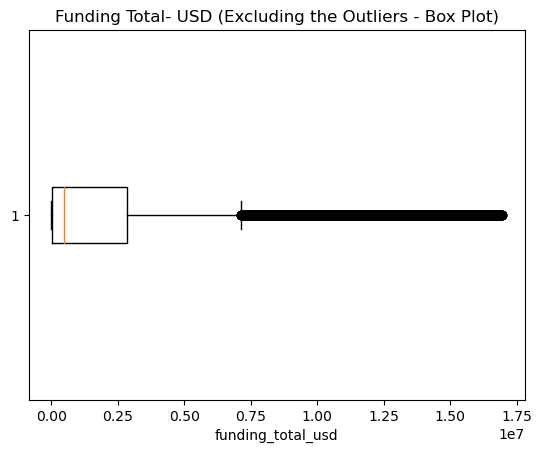

In [54]:
plt.boxplot(df_funding_total['funding_total_usd'], vert=False)
plt.title('Funding Total- USD (Excluding the Outliers - Box Plot)')
plt.xlabel('funding_total_usd')
plt.show()

#### B. Impute the outliers in the dataset with the value of mean

In [52]:
# Impute outliers with mean
df['funding_total_mean'] = df['funding_total_usd'].mask((df['funding_total_usd'] < funding_total_lower_bound) | (df['funding_total_usd'] > funding_total_upper_bound), df.funding_total_usd.mean())
df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,700000.0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,3406878.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2000000.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.0


In [55]:
print(f"The following are the data measure central tendecy and spread for the funding_total_usd when the outlier is replaced by the mean: \n{cds(df, 'funding_total_mean')}")

The following are the data measure central tendecy and spread for the funding_total_usd when the outlier is replaced by the mean: 
{'Mean': 4134572.432450031, 'Median': 1000000.0, 'Mode': 0.0, 'Minimum': 0.0, 'Maximum': 16940000.0, 'Range': 16940000.0, 'Q1': 40000.0, 'Q2': 1000000.0, 'Q3': 6800473.25, 'Interquartile Range': 6760473.25, 'Standard Deviation': 5611810.100934531, 'Variance': 31492412608950.83}


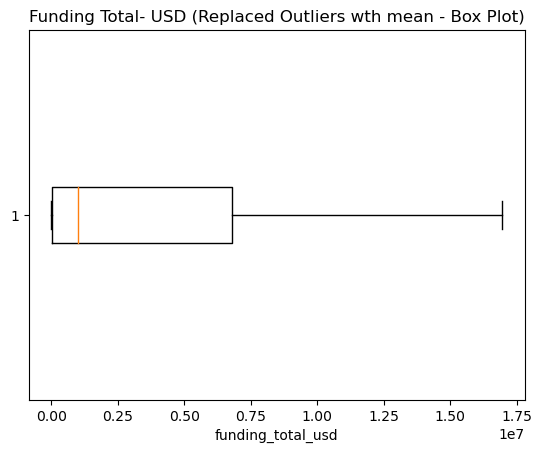

In [57]:
plt.boxplot(df['funding_total_mean'], vert=False)
plt.title('Funding Total- USD (Replaced Outliers wth mean - Box Plot)')
plt.xlabel('funding_total_usd')
plt.show()

#### C. Cap Outliers:

In [58]:
# Define maximum and minimum values
max_val = df["funding_total_usd"].mean() + 3 * df["funding_total_usd"].std()
min_val = df["funding_total_usd"].mean() - 3 * df["funding_total_usd"].std()

#capping the outliers away and we only have the distribution in 3 standard deviation

df_funding_total_cap = pd.DataFrame(np.where(df["funding_total_usd"] > max_val, max_val, 
         (np.where(df["funding_total_usd"] < min_val, min_val, df["funding_total_usd"]))), columns=["funding_total_usd"])

df_funding_total_cap.head(5)

,funding_total_usd
0,10000000.0
1,700000.0
2,3406878.0
3,2000000.0
4,0.0


In [59]:
print(f"The following are the data measure central tendecy and spread for the funding_total_usd when the outlier is replaced by the capped: \n{cds(df_funding_total_cap, 'funding_total_usd')}")

The following are the data measure central tendecy and spread for the funding_total_usd when the outlier is replaced by the capped: 
{'Mean': 12259760.32968874, 'Median': 1000000.0, 'Mode': 0.0, 'Minimum': 0.0, 'Maximum': 522197863.67918247, 'Range': 522197863.67918247, 'Q1': 40000.0, 'Q2': 1000000.0, 'Q3': 6800473.25, 'Interquartile Range': 6760473.25, 'Standard Deviation': 42179158.952928856, 'Variance': 1779081449976438.2}


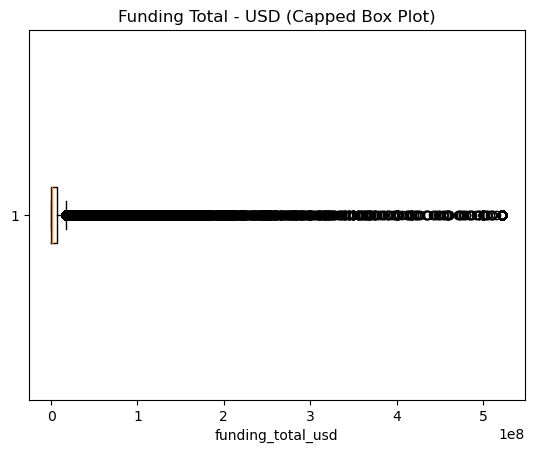

In [61]:
plt.boxplot(df_funding_total_cap['funding_total_usd'], vert=False)
plt.title('Funding Total - USD (Capped Box Plot)')
plt.xlabel('funding_total_usd')
plt.show()

#### IQR (Interquantile Range) for Funding Rounds

In [62]:
Q1 = df["funding_rounds"].quantile(0.25)
Q3 = df["funding_rounds"].quantile(0.75)
IQR_funding_round = Q3 - Q1
IQR_funding_round

1.0

In [63]:
funding_round_lower_bound = Q1 - 1.5 * IQR_funding_round
funding_round_upper_bound = Q3 + 1.5 * IQR_funding_round
print(f'The lower bound: {funding_round_lower_bound} and upper bound: {funding_round_upper_bound}')

The lower bound: -0.5 and upper bound: 3.5


### A. Drop Outliers for funding_rounds

In [64]:
index=df['funding_rounds'][(df['funding_rounds']>funding_round_upper_bound)|(df['funding_rounds']<funding_round_lower_bound)].index
df_funding_rounds =  df.drop(index)

In [65]:
print(f"The following are the data measure central tendecy and spread for the funding_rounds when the outlier is dropped: \n{cds(df_funding_rounds, 'funding_rounds')}")

The following are the data measure central tendecy and spread for the funding_rounds when the outlier is dropped: 
{'Mean': 1.3899488673032052, 'Median': 1.0, 'Mode': 1, 'Minimum': 1, 'Maximum': 3, 'Range': 2, 'Q1': 1.0, 'Q2': 1.0, 'Q3': 2.0, 'Interquartile Range': 1.0, 'Standard Deviation': 0.6507093536326846, 'Variance': 0.42342266290506614}


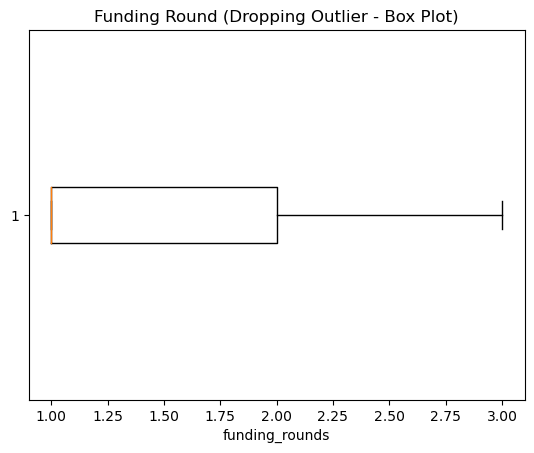

In [67]:
plt.boxplot(df_funding_rounds['funding_rounds'], vert=False)
plt.title('Funding Round (Dropping Outlier - Box Plot)')
plt.xlabel('funding_rounds')
plt.show()

### B. Impute the outliers in the dataset with the value of mean

In [68]:
# Impute outliers with mean
df['funding_rounds_mean'] = df['funding_rounds'].mask((df['funding_rounds'] < funding_round_lower_bound) | (df['funding_rounds'] > funding_round_upper_bound), df.funding_rounds.mean())
df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,10000000.0,1.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,700000.0,2.0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,3406878.0,1.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2000000.0,1.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.0,1.0


In [69]:
print(f"The following are the data measure central tendecy and spread for the funding_rounds when the outlier is replaced by the mean: \n{cds(df, 'funding_rounds_mean')}")

The following are the data measure central tendecy and spread for the funding_rounds when the outlier is replaced by the mean: 
{'Mean': 1.4205939807784533, 'Median': 1.0, 'Mode': 1.0, 'Minimum': 1.0, 'Maximum': 3.0, 'Range': 2.0, 'Q1': 1.0, 'Q2': 1.0, 'Q3': 2.0, 'Interquartile Range': 1.0, 'Standard Deviation': 0.6285730874700597, 'Variance': 0.39510412629164327}


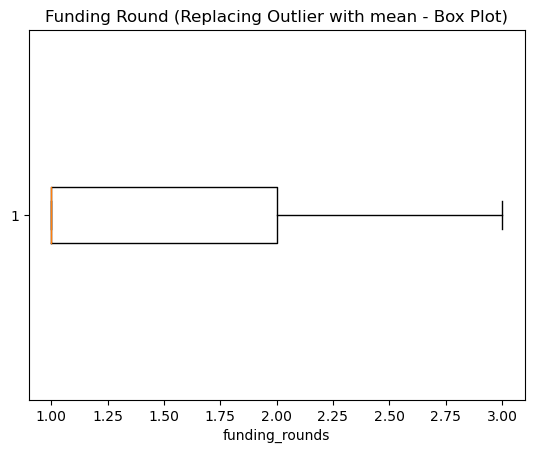

In [71]:
plt.boxplot(df['funding_rounds_mean'], vert=False)
plt.title('Funding Round (Replacing Outlier with mean - Box Plot)')
plt.xlabel('funding_rounds')
plt.show()

### C. Cap Outliers:

In [72]:
# Define maximum and minimum values
max_val = df["funding_rounds"].mean() + 3 * df["funding_rounds"].std()
min_val = df["funding_rounds"].mean() - 3 * df["funding_rounds"].std()

#capping the outliers away and we only have the distribution in 3 standard deviation

df_funding_rounds_cap = pd.DataFrame(np.where(df["funding_rounds"] > max_val, max_val, 
         (np.where(df["funding_rounds"] < min_val, min_val, df["funding_rounds"]))), columns=["funding_rounds"])

df_funding_rounds_cap.head(5)

,funding_rounds
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [73]:
print(f"The following are the data measure central tendecy and spread for the funding_rounds when the outlier is capped: \n{cds(df_funding_rounds_cap, 'funding_rounds')}")

The following are the data measure central tendecy and spread for the funding_rounds when the outlier is capped: 
{'Mean': 1.6928183077352044, 'Median': 1.0, 'Mode': 1.0, 'Minimum': 1.0, 'Maximum': 5.813274825301669, 'Range': 4.813274825301669, 'Q1': 1.0, 'Q2': 1.0, 'Q3': 2.0, 'Interquartile Range': 1.0, 'Standard Deviation': 1.1718553300586936, 'Variance': 1.3732449145869696}


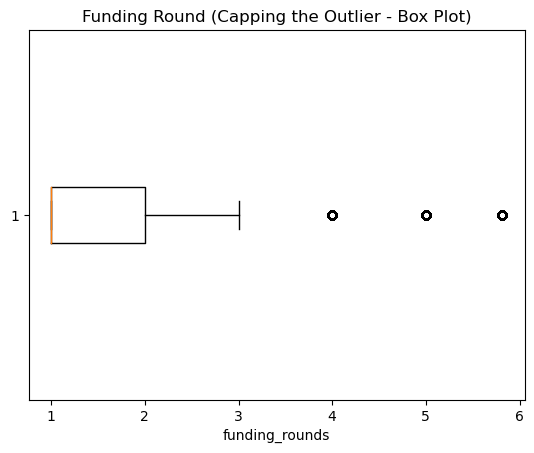

In [74]:
plt.boxplot(df_funding_rounds_cap['funding_rounds'], vert=False)
plt.title('Funding Round (Capping the Outlier - Box Plot)')
plt.xlabel('funding_rounds')
plt.show()

## 3- Sampling Techniques:

In [75]:
df_sample = df[['funding_rounds_mean', 'funding_total_mean']].sample(n=1000)
df_sample.head(5)

,funding_rounds_mean,funding_total_mean
7741,1.000000,4.161954e+06
1828,1.732522,1.491892e+07
56998,1.000000,1.650000e+05
60513,1.000000,0.000000e+00
28698,1.000000,0.000000e+00


In [76]:
cds(df_sample, 'funding_rounds_mean')

{'Mean': 1.414461909353906,
 'Median': 1.0,
 'Mode': 1.0,
 'Minimum': 1.0,
 'Maximum': 3.0,
 'Range': 2.0,
 'Q1': 1.0,
 'Q2': 1.0,
 'Q3': 2.0,
 'Interquartile Range': 1.0,
 'Standard Deviation': 0.6304292767151721,
 'Variance': 0.3974410729396151}

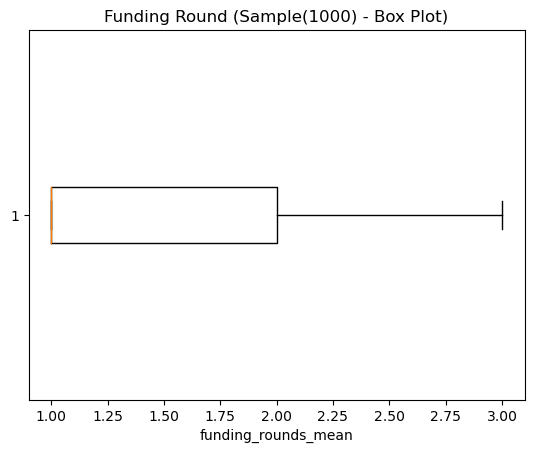

In [77]:
plt.boxplot(df_sample['funding_rounds_mean'], vert=False)
plt.title('Funding Round (Sample(1000) - Box Plot)')
plt.xlabel('funding_rounds_mean')
plt.show()

In [78]:
cds(df_sample, 'funding_total_mean')

{'Mean': 4018240.0282896105,
 'Median': 715000.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 16648351.0,
 'Range': 16648351.0,
 'Q1': 40000.0,
 'Q2': 715000.0,
 'Q3': 6176483.0,
 'Interquartile Range': 6136483.0,
 'Standard Deviation': 5659836.110158127,
 'Variance': 32033744793849.88}

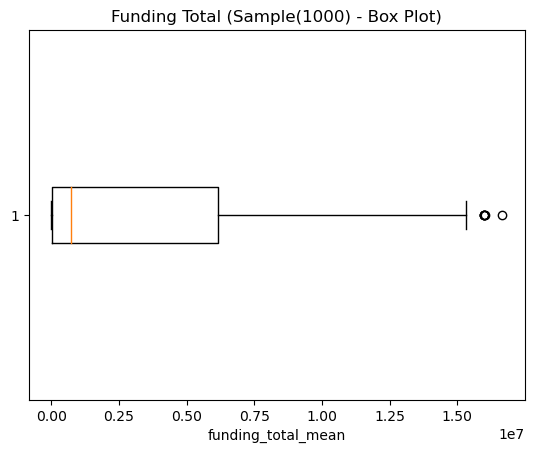

In [79]:
plt.boxplot(df_sample['funding_total_mean'], vert=False)
plt.title('Funding Total (Sample(1000) - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

## 5 - Subsetting and Sampling

In [80]:
# Subsetting and sampling for US-based companies
us_companies = df[df['country_code'] == 'USA']
us_companies.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,7.000000e+05,2.000000
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.000000e+00,1.000000
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,1.491892e+07,1.732522
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050.0,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,1.150050e+06,3.000000
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,0.0,operating,USA,NC,NC - Other,Connellys Springs,1,NaT,2013-04-21,2013-04-21,0.000000e+00,1.000000


### 20 Samples

In [81]:
us_companies_20 = us_companies.sample(20)
us_companies_20.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean
35662,/organization/mgt-capital-investments,MGT Capital Investments,http://mgtci.com,Finance|FinTech,8939981.0,operating,USA,NY,New York City,Harrison,3,1979-01-01,2012-11-19,2013-12-12,8.939981e+06,3.000000
3210,/organization/anda-networks,ANDA Networks,http://www.andanetworks.com,Mobile,10500000.0,operating,USA,CA,SF Bay Area,Sunnyvale,1,1998-01-01,2006-06-06,2006-06-06,1.050000e+07,1.000000
34236,/organization/maptia,Maptia,http://maptia.com,Curated Web|Finance|FinTech|Maps|Photography|T...,140000.0,operating,USA,WA,Seattle,Seattle,3,2012-01-01,2012-02-06,2012-08-01,1.400000e+05,3.000000
58615,/organization/topschool,TopSchool,http://www.topschoolinc.com,Education,20700000.0,operating,USA,CO,Denver,Denver,4,2008-05-01,2008-06-17,2012-03-15,1.491892e+07,1.732522
26652,/organization/ideaforest,IdeaForest,NaN,Web Browsers|Web Development|Web Hosting,28000000.0,operating,USA,CA,Los Angeles,El Segundo,3,NaT,1999-10-14,2006-03-30,1.491892e+07,3.000000


In [82]:
cds(us_companies_20, 'funding_total_mean')

{'Mean': 6401871.880986707,
 'Median': 1462500.0,
 'Mode': 14918922.374247737,
 'Minimum': 0.0,
 'Maximum': 14918922.374247737,
 'Range': 14918922.374247737,
 'Q1': 100000.0,
 'Q2': 1462500.0,
 'Q3': 14918922.374247737,
 'Interquartile Range': 14818922.374247737,
 'Standard Deviation': 6836095.110992836,
 'Variance': 46732196366540.16}

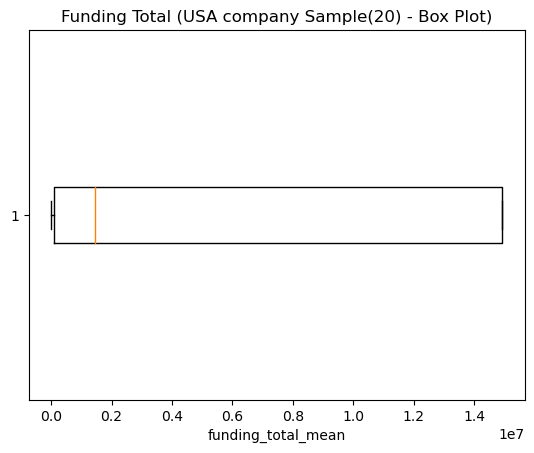

In [83]:
plt.boxplot(us_companies_20['funding_total_mean'], vert=False)
plt.title('Funding Total (USA company Sample(20) - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

### 50 Samples

In [84]:
us_companies_50 = us_companies.sample(50)
us_companies_50.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean
48765,/organization/roikoi,ROIKOI,http://roikoi.com,Professional Services|Recruiting|Social Recrui...,3100000.0,operating,USA,TX,Austin,Austin,2,2013-01-01,2014-03-14,2015-10-13,3100000.0,2.000000
28302,/organization/intellirod-spine,Orthodata,http://intellirodspine.com,Health Care,2202375.0,operating,USA,OH,Akron - Canton,Akron,4,2003-01-01,2009-12-22,2014-01-21,2202375.0,1.732522
52488,/organization/smartech-mfg-corp,SMARTECH MFG,http://www.smartechcnc.com/,Manufacturing,0.0,operating,USA,NY,New York City,Mount Vernon,1,2005-12-14,2012-04-10,2012-04-10,0.0,1.000000
35698,/organization/michael-bieker,Michael Bieker,NaN,Finance|Venture Capital,30000.0,operating,USA,OR,Eugene,Bend,1,2008-01-01,2014-05-28,2014-05-28,30000.0,1.000000
18719,/organization/eris-exchange,Eris Exchange,http://www.erisfutures.com,Financial Services,0.0,operating,USA,IL,Chicago,Chicago,1,2010-01-01,2012-09-25,2012-09-25,0.0,1.000000


In [85]:
cds(us_companies_50, 'funding_total_mean')

{'Mean': 4407257.919879638,
 'Median': 2107972.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 16000000.0,
 'Range': 16000000.0,
 'Q1': 26250.0,
 'Q2': 2107972.0,
 'Q3': 5925000.0,
 'Interquartile Range': 5898750.0,
 'Standard Deviation': 5595547.483061469,
 'Variance': 31310151635195.547}

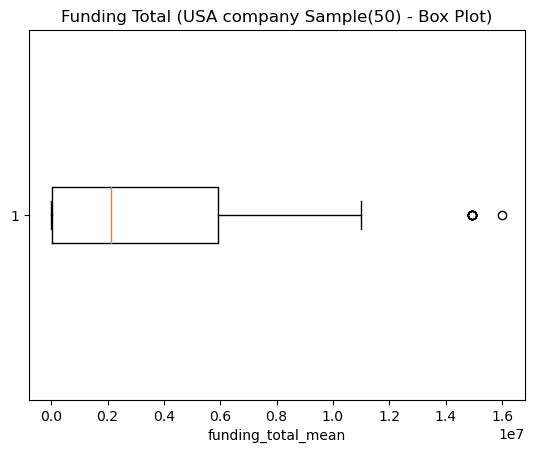

In [86]:
plt.boxplot(us_companies_50['funding_total_mean'], vert=False)
plt.title('Funding Total (USA company Sample(50) - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

### 100 Samples

In [87]:
us_companies_100 = us_companies.sample(100)
us_companies_100.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean
3961,/organization/aptara,Aptara,http://www.aptaracorp.com,Mobile,23000000.0,operating,USA,VA,"Washington, D.C.",Falls Church,1,1988-01-01,2007-09-19,2007-09-19,1.491892e+07,1.0
16464,/organization/dreamscloud,DreamsCloud,http://dreamscloud.com,Android|Apps|Content|Curated Web|Databases|Fac...,2000000.0,operating,USA,DC,"Washington, D.C.",Washington,1,2009-01-01,2014-08-26,2014-08-26,2.000000e+06,1.0
23477,/organization/gohealth,GoHealth,http://www.gohealthinsurance.com,Health and Wellness,75375733.0,operating,USA,IL,Chicago,Chicago,2,NaT,2012-06-12,2015-10-06,1.491892e+07,2.0
14484,/organization/cytogel-pharma,Cytogel Pharma,http://www.cytogelpharma.com,Biotechnology,5131190.0,operating,USA,CT,Hartford,Darien,3,2000-01-01,2010-05-17,2015-01-07,5.131190e+06,3.0
41753,/organization/ovatemp,Ovatemp,http://ovatemp.com,Fertility|Health and Wellness|Mobile Health|Women,120000.0,operating,USA,MA,Boston,Newton,1,2014-05-13,2015-03-01,2015-03-01,1.200000e+05,1.0


In [88]:
cds(us_companies_100, 'funding_total_mean')

{'Mean': 4145961.4644591827,
 'Median': 1693500.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 14918922.374247737,
 'Range': 14918922.374247737,
 'Q1': 73750.0,
 'Q2': 1693500.0,
 'Q3': 7325000.0,
 'Interquartile Range': 7251250.0,
 'Standard Deviation': 5242656.578468805,
 'Variance': 27485447999762.24}

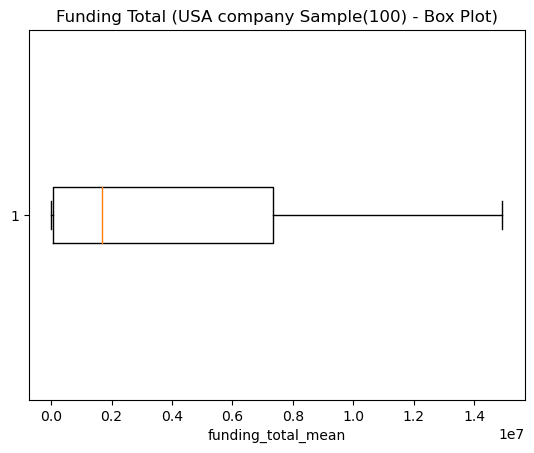

In [89]:
plt.boxplot(us_companies_100['funding_total_mean'], vert=False)
plt.title('Funding Total (USA company Sample(100) - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

### 500 Samples

In [90]:
us_companies_500 = us_companies.sample(500)
us_companies_500.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean
49622,/organization/satmetrix,Satmetrix,http://www.satmetrix.com,Loyalty Programs|Software,50800000.0,operating,USA,CA,SF Bay Area,Redwood City,10,1997-01-01,2001-07-01,2013-09-01,1.491892e+07,1.732522
45199,/organization/prismic-pharmaceuticals,Prismic Pharmaceuticals,http://www.prismicpharma.com,Biotechnology,1200000.0,operating,USA,AZ,Phoenix,Scottsdale,1,NaT,2013-02-20,2013-02-20,1.200000e+06,1.000000
55316,/organization/sumridge-partners,SumRidge Partners,http://www.sumridge.com,Finance,3609590.0,operating,USA,NJ,Newark,Jersey City,1,NaT,2010-09-30,2010-09-30,3.609590e+06,1.000000
34905,/organization/medibeacon,MediBeacon,http://www.medibeacon.com,Biotechnology,30958000.0,operating,USA,MO,St. Louis,St Louis,4,2011-01-01,2013-01-01,2015-08-27,1.491892e+07,1.732522
9317,/organization/calypto-design-systems,Calypto Design Systems,http://calypto.com,EDA Tools|Software,18813485.0,acquired,USA,CA,SF Bay Area,San Jose,3,2002-01-01,2004-09-13,2011-02-04,1.491892e+07,3.000000


In [91]:
cds(us_companies_500, 'funding_total_mean')

{'Mean': 4649469.533461849,
 'Median': 1528750.0,
 'Mode': 14918922.374247737,
 'Minimum': 0.0,
 'Maximum': 16900000.0,
 'Range': 16900000.0,
 'Q1': 118750.0,
 'Q2': 1528750.0,
 'Q3': 8541512.0,
 'Interquartile Range': 8422762.0,
 'Standard Deviation': 5724590.939655636,
 'Variance': 32770941426387.402}

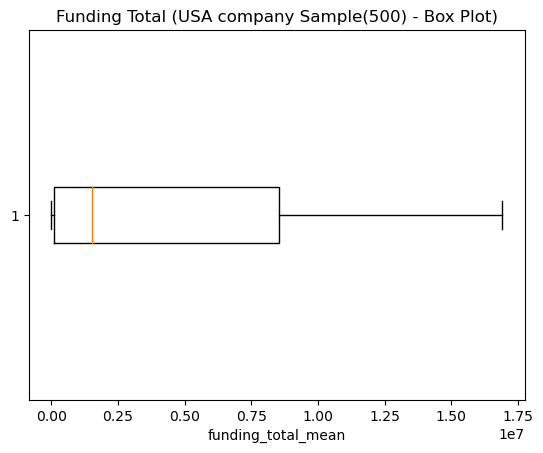

In [92]:
plt.boxplot(us_companies_500['funding_total_mean'], vert=False)
plt.title('Funding Total (USA company Sample(500) - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

### 1000 samples

In [93]:
us_companies_1000 = us_companies.sample(1000)
us_companies_1000.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean
62427,/organization/vivant,Vivant,NaN,NaN,11600000.0,acquired,USA,CA,SF Bay Area,Oakland,1,NaT,1999-12-02,1999-12-02,1.160000e+07,1.000000
60132,/organization/u4ea-wireless,U4EA Wireless,http://u4eawireless.net,Mobile,19300000.0,closed,USA,CA,SF Bay Area,Pittsburg,3,2000-01-01,2005-07-07,2007-07-17,1.491892e+07,3.000000
15728,/organization/digitalocean,DigitalOcean,http://www.digitalocean.com,Cloud Computing|Finance|Networking|Virtualizat...,175205800.0,operating,USA,NY,New York City,New York,6,2011-06-24,2012-05-17,2015-07-08,1.491892e+07,1.732522
35544,/organization/metasearch,Meta Search,https://www.meta.sc/,Document Management|File Sharing|SaaS|Search,0.0,operating,USA,MA,Boston,Boston,2,NaT,2014-06-01,2015-04-01,0.000000e+00,2.000000
57906,/organization/think-upgrade-llc,Think Upgrade,http://www.gofundme.com/TU-LLC,Medical,2000.0,operating,USA,GA,Atlanta,Atlanta,1,2012-02-28,2013-08-14,2013-08-14,2.000000e+03,1.000000


In [94]:
cds(us_companies_1000, 'funding_total_mean')

{'Mean': 4678929.199401286,
 'Median': 1407500.0,
 'Mode': 14918922.374247737,
 'Minimum': 0.0,
 'Maximum': 16900000.0,
 'Range': 16900000.0,
 'Q1': 118000.0,
 'Q2': 1407500.0,
 'Q3': 8577945.5,
 'Interquartile Range': 8459945.5,
 'Standard Deviation': 5739989.788630413,
 'Variance': 32947482773581.41}

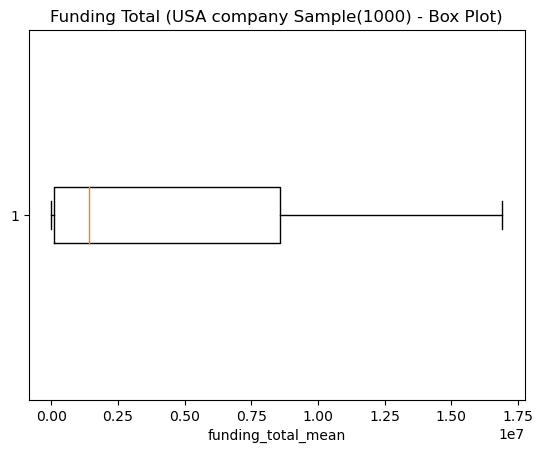

In [95]:
plt.boxplot(us_companies_1000['funding_total_mean'], vert=False)
plt.title('Funding Total (USA company Sample(1000) - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

## 6 -  Subsetting, Sampling, Benchmarking and Visualisation

1. Calculate the Funding Duration for Each Startup:
Subtract the founding date (if available) from the first_funding_at or last_funding_at date to find the duration of funding.

2. Compute the Average Duration:
Calculate the mean of the funding durations across all startups to get the average number of days taken for a startup to be funded.

In [96]:
# Calculate the number of days taken for funding
df['days_to_funding'] = (df['first_funding_at'] - df['founded_at']).dt.days

Negative values for days_to_funding might indicate an issue with the data or calculation, suggesting that funding occurred before the founding date. In cases where days_to_funding shows negative values, you might need to handle these instances by adjusting your calculation or imputing missing or incorrect data. Therefore, we will be dropping negative and None funding duration.

In [97]:
df_funding_duration = df.copy()

In [98]:
df_funding_duration = df_funding_duration[df_funding_duration['days_to_funding']>= 0]
df_funding_duration

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2.000000e+06,1.000000,443.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.000000e+00,1.000000,1665.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.0,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,7.628510e+05,2.000000,4636.0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,1.491892e+07,1.732522,733.0
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000.0,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,4.000000e+04,1.000000,414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877.0,closed,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15,1.541988e+07,1.732522,5113.0
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600.0,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29,2.686600e+06,1.000000,2220.0
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000.0,operating,GBR,H9,London,London,3,2014-01-28,2014-03-24,2015-02-25,1.120000e+06,3.000000,55.0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,0.0,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,0.000000e+00,1.000000,1308.0


In [99]:
# Filter data for the specified countries
selected_countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND', 'KOR']
filtered_data = df_funding_duration[df_funding_duration['country_code'].isin(selected_countries)]

In [100]:
#create stratified group based on income as attributes
df_selected = filtered_data.groupby("country_code", group_keys=False)

In [101]:
#draw sample from the group
df_sampled_data = df_selected.apply(lambda x: x.sample(n=15))
df_sampled_data.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding
64532,/organization/wriber,Wriber,http://wriber.com,Apps|Artificial Intelligence|SaaS|Software,135000.0,operating,CAN,ON,Toronto,Kitchener,2,2012-05-01,2013-05-01,2014-10-01,1.350000e+05,2.0,365.0
39977,/organization/nudestix,NUDESTIX,http://www.nudestix.com,Fashion,0.0,operating,CAN,ON,Toronto,Toronto,1,2014-01-01,2015-11-18,2015-11-18,0.000000e+00,1.0,686.0
65326,/organization/yottayotta,YottaYotta,NaN,Data Visualization,40648791.0,closed,CAN,AB,Edmonton,Edmonton,2,2000-01-01,2000-08-29,2004-03-01,1.491892e+07,2.0,241.0
41904,/organization/ozz-electric,OZZ Electric,http://www.ozzelectric.com,Clean Technology,0.0,operating,CAN,ON,Toronto,Concord,1,1991-01-01,2012-11-17,2012-11-17,0.000000e+00,1.0,7991.0
49305,/organization/sagecrowd,sageCrowd,http://www.sagecrowd.com,Education|Social Media|Training,850000.0,operating,CAN,NS,Halifax,Halifax,1,2012-01-01,2014-01-30,2014-01-30,8.500000e+05,1.0,760.0


In [102]:
average_days_per_country = df_sampled_data.groupby('country_code', as_index=False)['days_to_funding'].mean()

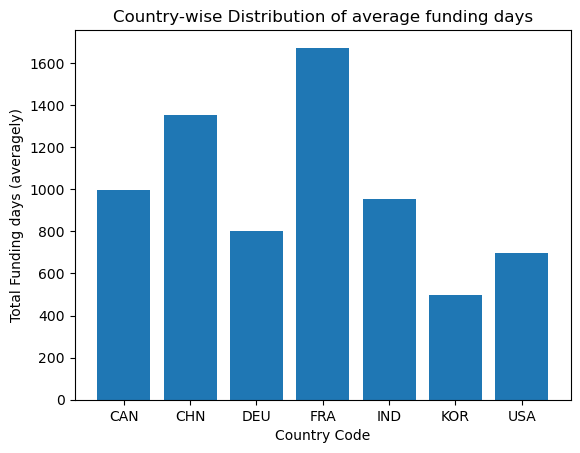

In [103]:
# Bar chart of country-wise company count
plt.bar(average_days_per_country['country_code'], average_days_per_country['days_to_funding'])
plt.xlabel('Country Code')
plt.ylabel('Total Funding days (averagely)')
plt.title('Country-wise Distribution of average funding days')
plt.show()


#### USA

In [105]:
df_usa = df_sampled_data[df_sampled_data['country_code'] =='USA']

In [106]:
cds(df_usa, 'funding_total_mean')

{'Mean': 3370178.491616516,
 'Median': 738525.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 16787546.0,
 'Range': 16787546.0,
 'Q1': 37500.0,
 'Q2': 738525.0,
 'Q3': 1250000.0,
 'Interquartile Range': 1212500.0,
 'Standard Deviation': 5827367.877330611,
 'Variance': 33958216377744.676}

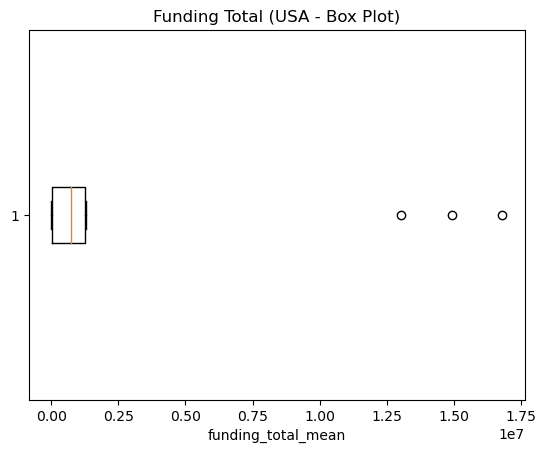

In [107]:
plt.boxplot(df_usa['funding_total_mean'], vert=False)
plt.title('Funding Total (USA - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

#### CAN

In [108]:
df_can = df_sampled_data[df_sampled_data['country_code'] =='CAN']

In [109]:
cds(df_can, 'funding_total_mean')

{'Mean': 3839020.116566365,
 'Median': 399857.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 16149048.0,
 'Range': 16149048.0,
 'Q1': 25000.0,
 'Q2': 399857.0,
 'Q3': 4825000.0,
 'Interquartile Range': 4800000.0,
 'Standard Deviation': 6132037.011988779,
 'Variance': 37601877916400.266}

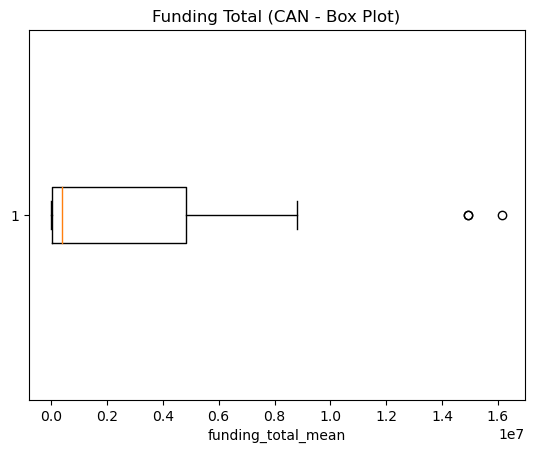

In [110]:
plt.boxplot(df_can['funding_total_mean'], vert=False)
plt.title('Funding Total (CAN - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

#### FRA

In [111]:
df_fra = df_sampled_data[df_sampled_data['country_code'] =='FRA']

In [112]:
cds(df_fra, 'funding_total_mean')

{'Mean': 3785379.2471463624,
 'Median': 2662400.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 14918922.374247737,
 'Range': 14918922.374247737,
 'Q1': 167974.5,
 'Q2': 2662400.0,
 'Q3': 5391092.0,
 'Interquartile Range': 5223117.5,
 'Standard Deviation': 4381132.326605433,
 'Variance': 19194320463227.13}

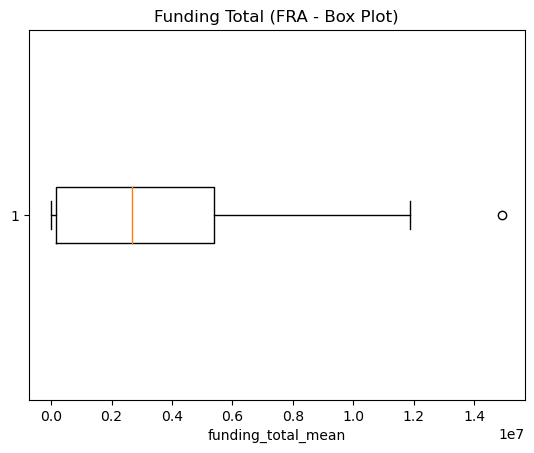

In [113]:
plt.boxplot(df_fra['funding_total_mean'], vert=False)
plt.title('Funding Total (FRA - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

#### DEU

In [114]:
df_deu = df_sampled_data[df_sampled_data['country_code'] =='DEU']

In [115]:
cds(df_deu, 'funding_total_mean')

{'Mean': 4520001.874849548,
 'Median': 1248675.0,
 'Mode': 14918922.374247737,
 'Minimum': 0.0,
 'Maximum': 14918922.374247737,
 'Range': 14918922.374247737,
 'Q1': 52379.0,
 'Q2': 1248675.0,
 'Q3': 7762771.0,
 'Interquartile Range': 7710392.0,
 'Standard Deviation': 5882115.127749988,
 'Variance': 34599278376105.258}

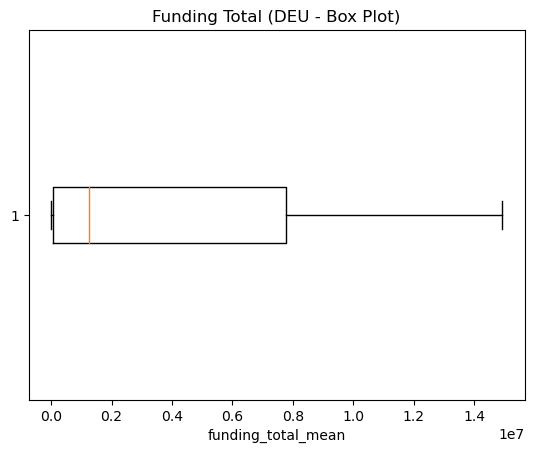

In [116]:
plt.boxplot(df_deu['funding_total_mean'], vert=False)
plt.title('Funding Total (DEU - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

#### CHN

In [117]:
df_chn = df_sampled_data[df_sampled_data['country_code'] =='CHN']

In [118]:
cds(df_chn, 'funding_total_mean')

{'Mean': 5607251.141516214,
 'Median': 57000.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 15000000.0,
 'Range': 15000000.0,
 'Q1': 0.0,
 'Q2': 57000.0,
 'Q3': 14379461.187123869,
 'Interquartile Range': 14379461.187123869,
 'Standard Deviation': 6912520.659238403,
 'Variance': 47782941864397.73}

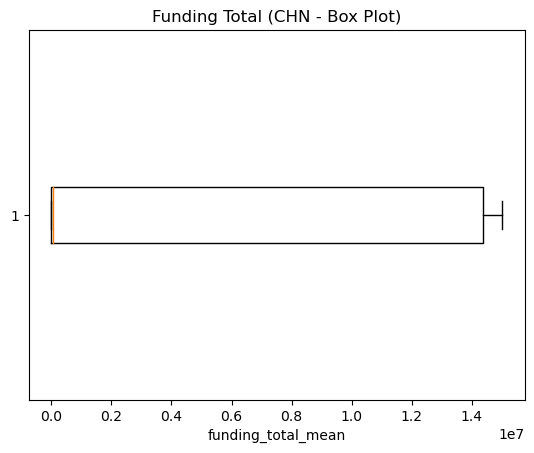

In [119]:
plt.boxplot(df_chn['funding_total_mean'], vert=False)
plt.title('Funding Total (CHN - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

#### IND

In [120]:
df_ind = df_sampled_data[df_sampled_data['country_code'] =='IND']

In [121]:
cds(df_ind, 'funding_total_mean')

{'Mean': 2867736.0,
 'Median': 300000.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 15400000.0,
 'Range': 15400000.0,
 'Q1': 8000.0,
 'Q2': 300000.0,
 'Q3': 450000.0,
 'Interquartile Range': 442000.0,
 'Standard Deviation': 5423739.93916965,
 'Variance': 29416954927744.0}

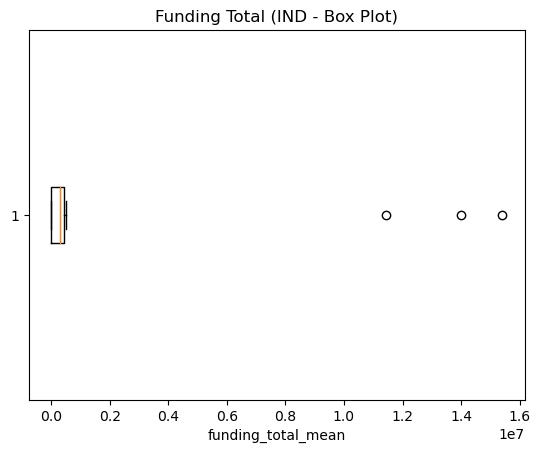

In [122]:
plt.boxplot(df_ind['funding_total_mean'], vert=False)
plt.title('Funding Total (IND - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

#### KOR

In [123]:
df_kor = df_sampled_data[df_sampled_data['country_code'] =='KOR']

In [124]:
cds(df_kor, 'funding_total_mean')

{'Mean': 3865460.6,
 'Median': 1388000.0,
 'Mode': 0.0,
 'Minimum': 0.0,
 'Maximum': 16000000.0,
 'Range': 16000000.0,
 'Q1': 284598.0,
 'Q2': 1388000.0,
 'Q3': 3971522.5,
 'Interquartile Range': 3686924.5,
 'Standard Deviation': 5296500.693150952,
 'Variance': 28052919592548.516}

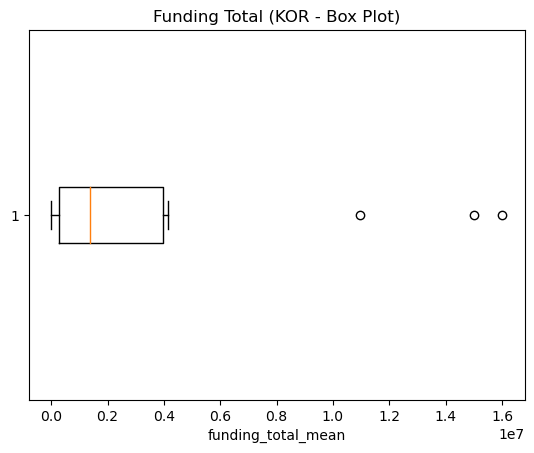

In [125]:
plt.boxplot(df_kor['funding_total_mean'], vert=False)
plt.title('Funding Total (KOR - Box Plot)')
plt.xlabel('funding_total_mean')
plt.show()

## Probability Theory

In [126]:
# Filter data for the specified countries
selected_countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']
filtered_data = df[df['country_code'].isin(selected_countries)]

In [127]:
# Calculate probability of funding within 6 months for overall dataset
total_startups = len(filtered_data)
funded_within_6months = len(filtered_data[filtered_data['days_to_funding'] <= 6 * 30])
probability_total = funded_within_6months / total_startups

In [128]:
print(f"Probability of funding within 6 months for the overall dataset: {probability_total:.2%}")

Probability of funding within 6 months for the overall dataset: 19.81%


In [129]:
results = {}

for country in selected_countries:
    subset = filtered_data[filtered_data['country_code'] == country]
    funded_within_6months_country = len(subset[subset['days_to_funding'] <= 6 * 30])
    probability_country = (funded_within_6months_country / len(subset)) * 100
    results[country] = probability_country

In [130]:
# Display the results
for country, probability in results.items():
    print(f"Probability of funding within 6 months in {country}: {probability} %")

Probability of funding within 6 months in USA: 20.286694502805776 %
Probability of funding within 6 months in CAN: 19.428571428571427 %
Probability of funding within 6 months in FRA: 17.444933920704848 %
Probability of funding within 6 months in DEU: 23.56746765249538 %
Probability of funding within 6 months in CHN: 10.103626943005182 %
Probability of funding within 6 months in IND: 17.543859649122805 %


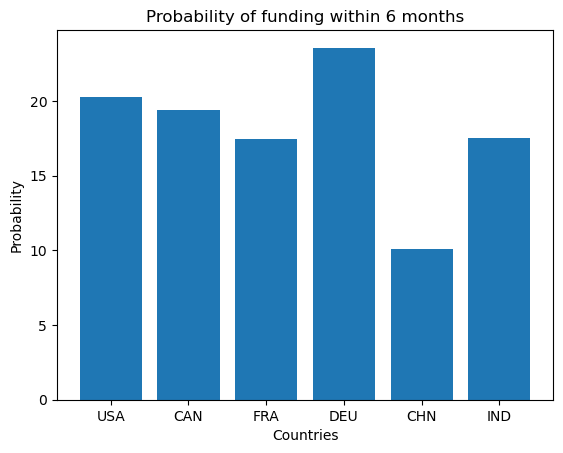

In [131]:
# Bar chart of country-wise company count
plt.bar(results.keys(), results.values())
plt.xlabel('Countries')
plt.ylabel('Probability')
plt.title('Probability of funding within 6 months')
plt.show()


## 8 - Advanced Probability Theory

In [132]:
software_startups = df[df['category_list'] == 'Software']

In [133]:
# Total software startups funded within 6 months
software_funded_6_months = software_startups[software_startups['days_to_funding'] <= 180]

In [134]:
# Probability for software domain
probability_software = len(software_funded_6_months) / len(software_startups)
print(f"Probability startups of being funded within the first 6 months given the fact that they are based on software domain for the overall dataset: {probability_software:.2%}")

Probability startups of being funded within the first 6 months given the fact that they are based on software domain for the overall dataset: 10.39%


In [135]:
# Repeat for each country
country_probabilities = {}
countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']
for country in countries:
    # Filter by country
    country_startups = software_startups[software_startups['country_code'] == country]
    country_funded_6_months = country_startups[country_startups['days_to_funding'] <= 180]
    
    # Calculate probability for the country
    country_probability = (len(country_funded_6_months) / len(country_startups))  * 100
    country_probabilities[country] = country_probability

# Output probabilities
print("Probability for Software Domain:", probability_software)
print("Country-wise Probabilities:", country_probabilities)

Probability for Software Domain: 0.10387984981226533
Country-wise Probabilities: {'USA': 9.835452505609574, 'CAN': 9.923664122137405, 'FRA': 5.511811023622047, 'DEU': 9.375, 'CHN': 5.797101449275362, 'IND': 10.81081081081081}


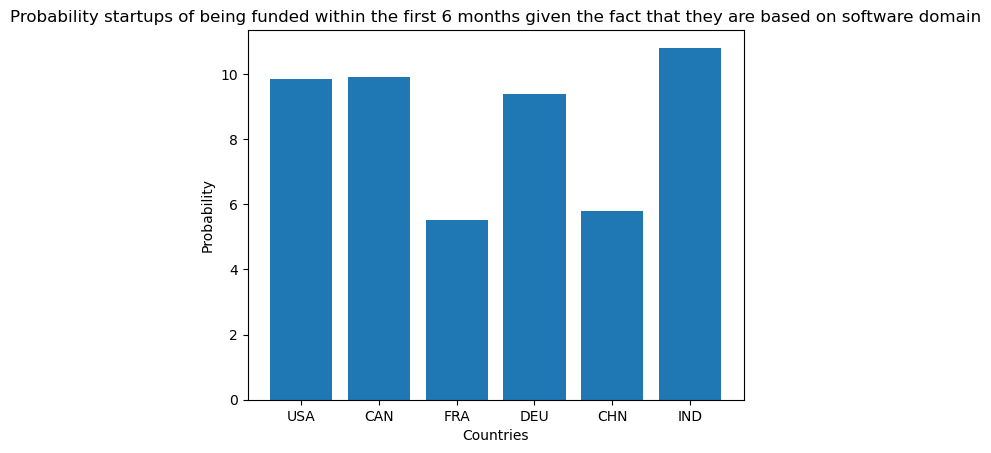

In [136]:
# Bar chart of country-wise company count
plt.bar(country_probabilities.keys(), country_probabilities.values())
plt.xlabel('Countries')
plt.ylabel('Probability')
plt.title('Probability startups of being funded within the first 6 months given the fact that they are based on software domain')
plt.show()


## 9 -   Advanced Probability Theory

In [137]:
# Filter for startups funded within the first 6 months
funded_within_6_months = df[df['days_to_funding'] <= 180]

In [138]:
# Filter for startups in the health care domain
healthcare_startups = funded_within_6_months[funded_within_6_months['category_list'] == 'Health Care']

In [139]:
# Calculate overall probability for Health Care domain
total_healthcare_startups = len(healthcare_startups)
total_funded_6_months = len(funded_within_6_months)
probability_healthcare = total_healthcare_startups / total_funded_6_months
print(f"Probability startup belongs to health care domain given the fact that it was funded within the first 6 months for the overall dataset: {probability_healthcare:.2%}")

Probability startup belongs to health care domain given the fact that it was funded within the first 6 months for the overall dataset: 0.37%


In [140]:
# Define countries
countries = ['USA', 'CAN', 'FRA', 'DEU', 'CHN', 'IND']

In [141]:
# Calculate probabilities for each country
country_probabilities_healthcare = {}
for country in countries:
    # Filter startups funded within 6 months for each country
    country_funded_6_months = funded_within_6_months[funded_within_6_months['country_code'] == country]
    
    # Filter 'Health Care' startups for each country
    country_healthcare_startups = country_funded_6_months[country_funded_6_months['category_list'] == 'Health Care']
    total_country_funded_6_months = len(country_funded_6_months)
    
    # Calculate country-specific probability for Health Care domain
    country_probability_healthcare = (len(country_healthcare_startups) / total_country_funded_6_months) * 100
    country_probabilities_healthcare[country] = country_probability_healthcare

# Output probabilities
print("Probability for Health Care Domain (Overall):", probability_healthcare)
print("Country-wise Probabilities for Health Care Startups:", country_probabilities_healthcare)

Probability for Health Care Domain (Overall): 0.0036611983383792158
Country-wise Probabilities for Health Care Startups: {'USA': 0.4981646565285789, 'CAN': 0.0, 'FRA': 0.5050505050505051, 'DEU': 0.39215686274509803, 'CHN': 0.0, 'IND': 0.35714285714285715}


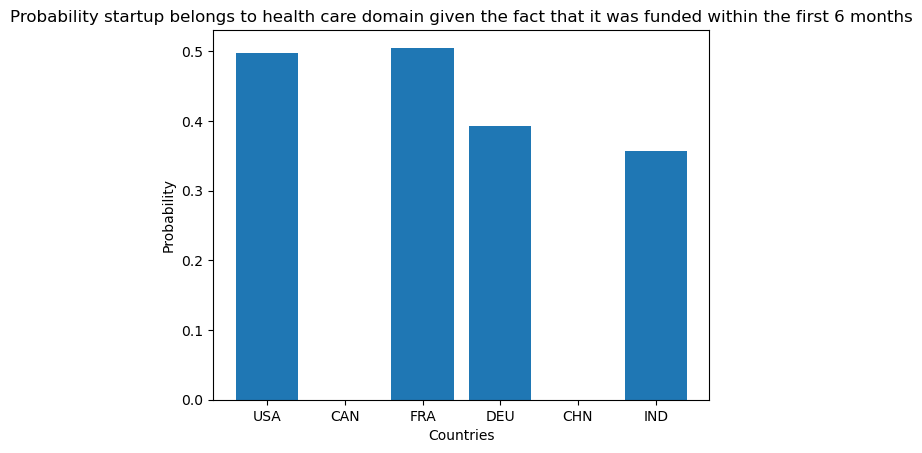

In [142]:
# Bar chart of country-wise company count
plt.bar(country_probabilities_healthcare.keys(), country_probabilities_healthcare.values())
plt.xlabel('Countries')
plt.ylabel('Probability')
plt.title('Probability startup belongs to health care domain given the fact that it was funded within the first 6 months')
plt.show()

## 10 -   Advanced Probability Theory

#### Random Sample 10 data points

In [143]:
sample_data = df.sample(10)

In [144]:
df_software_startups_10 = sample_data[sample_data['category_list'] == 'Software']

In [145]:
# Total software startups funded within 6 months
df_software_funded_6_months_10 = df_software_startups_10[df_software_startups_10['days_to_funding'] <= 180]
df_software_funded_6_months_10.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding


No data was selected randomly

#### Random Sample 50 data points

In [149]:
sample_data = df.sample(50)

In [150]:
df_software_startups_50 = sample_data[sample_data['category_list'] == 'Software']

In [151]:
# Total software startups funded within 6 months
df_software_funded_6_months_50 = df_software_startups_50[df_software_startups_50['days_to_funding'] <= 180]
df_software_funded_6_months_50.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding


In [152]:
# Probability for software domain
probability_software = len(df_software_funded_6_months_50) / len(df_software_startups_50)
print(f"Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 50 dataset: {probability_software:.2%}")

Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 50 dataset: 0.00%


#### Random Sample 100 data points

In [153]:
sample_data = df.sample(100)

In [154]:
df_software_startups_100 = sample_data[sample_data['category_list'] == 'Software']

In [155]:
# Total software startups funded within 6 months
df_software_funded_6_months_100 = df_software_startups_100[df_software_startups_100['days_to_funding'] <= 180]
df_software_funded_6_months_100.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding


In [156]:
# Probability for software domain
probability_software = len(df_software_funded_6_months_100) / len(df_software_startups_100)
print(f"Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 100 dataset: {probability_software:.2%}")

Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 100 dataset: 0.00%


#### Random Sample 200 data points

In [157]:
sample_data = df.sample(200)

In [158]:
df_software_startups_200 = sample_data[sample_data['category_list'] == 'Software']

In [159]:
# Total software startups funded within 6 months
df_software_funded_6_months_200 = df_software_startups_200[df_software_startups_200['days_to_funding'] <= 180]
df_software_funded_6_months_200.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding
27144,/organization/impact-driven,Impact Driven,http://impactdriven.co,Software,35000.0,operating,USA,CO,Denver,Boulder,1,2013-01-01,2013-05-07,2013-05-07,35000.0,1.0,126.0


In [160]:
# Probability for software domain
probability_software = len(df_software_funded_6_months_200) / len(df_software_startups_200)
print(f"Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 200 dataset: {probability_software:.2%}")

Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 200 dataset: 16.67%


#### Random Sample 300 data points

In [161]:
sample_data = df.sample(300)

In [162]:
df_software_startups_300 = sample_data[sample_data['category_list'] == 'Software']

In [163]:
# Total software startups funded within 6 months
df_software_funded_6_months_300 = df_software_startups_300[df_software_startups_300['days_to_funding'] <= 180]
df_software_funded_6_months_300.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding
47006,/organization/rayn,Rayn,NaN,Software,0.0,operating,USA,CA,Anaheim,Newport Beach,1,2014-06-04,2014-05-15,2014-05-15,0.0,1.0,-20.0


In [164]:
# Probability for software domain
probability_software = len(df_software_funded_6_months_300) / len(df_software_startups_300)
print(f"Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 300 dataset: {probability_software:.2%}")

Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 300 dataset: 4.35%


#### Random Sample 400 data points

In [165]:
sample_data = df.sample(400)

In [166]:
df_software_startups_400 = sample_data[sample_data['category_list'] == 'Software']

In [167]:
# Total software startups funded within 6 months
df_software_funded_6_months_400 = df_software_startups_400[df_software_startups_400['days_to_funding'] <= 180]
df_software_funded_6_months_400.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding
44915,/organization/preferred-networks,Preferred Networks,http://www.preferred-networks.jp/,Software,0.000000e+00,operating,JPN,40,Tokyo,Tokyo,1,2014-03-26,2011-02-03,2011-02-03,0.000000e+00,1.000000,-1147.0
38181,/organization/nantmobile,NantMobile,http://nantmobile.com/,Software,1.100000e+08,operating,USA,CA,Los Angeles,Culver City,4,2013-01-01,2012-10-03,2014-10-31,1.491892e+07,1.732522,-90.0
35440,/organization/mesh-korea,Mesh Korea,http://meshkorea.net/en,Software,8.831615e+06,operating,KOR,11,Seoul,Seoul,4,2013-01-18,2013-01-18,2015-10-30,8.831615e+06,1.732522,0.0
20081,/organization/favoe,Favoe,http://rocketpun.ch/company/favoe,Software,3.568700e+04,operating,KOR,11,Seoul,Seoul,1,2013-08-09,2013-08-05,2013-08-05,3.568700e+04,1.000000,-4.0
50511,/organization/sendgrid,SendGrid,http://www.sendgrid.com,Software,4.736200e+07,operating,USA,CO,Denver,Boulder,5,2009-07-20,2009-08-06,2014-12-02,1.491892e+07,1.732522,17.0
58252,/organization/timefree-innovations,TimeFree Innovations,http://www.tfinnovations.com,Software,2.500000e+04,operating,PHL,D9,Manila,Makati,1,2013-01-01,2013-04-05,2013-04-05,2.500000e+04,1.000000,94.0


In [168]:
# Probability for software domain
probability_software = len(df_software_funded_6_months_400) / len(df_software_startups_400)
print(f"Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 400 dataset: {probability_software:.2%}")

Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 400 dataset: 24.00%


#### Random Sample 500 data points

In [169]:
sample_data = df.sample(500)

In [170]:
df_software_startups_500 = sample_data[sample_data['category_list'] == 'Software']

In [171]:
# Total software startups funded within 6 months
df_software_funded_6_months_500 = df_software_startups_500[df_software_startups_500['days_to_funding'] <= 180]
df_software_funded_6_months_500.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_total_mean,funding_rounds_mean,days_to_funding
40273,/organization/obsorb,Obsorb,http://obsorb.com,Software,150000.0,operating,USA,MO,St. Louis,St Louis,2,2011-02-01,2011-05-01,2011-06-20,150000.0,2.000000,89.0
56262,/organization/talespring,TaleSpring,http://www.talespring.com,Software,0.0,operating,USA,UT,Salt Lake City,Orem,1,2010-05-01,2010-09-03,2010-09-03,0.0,1.000000,125.0
14454,/organization/cypher,CYPHER,http://cyphercorp.com,Software,5561939.0,operating,USA,UT,Salt Lake City,South Jordan,4,2012-01-01,2012-04-17,2015-03-24,5561939.0,1.732522,107.0


In [172]:
# Probability for software domain
probability_software = len(df_software_funded_6_months_500) / len(df_software_startups_500)
print(f"Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 500 dataset: {probability_software:.2%}")

Probability startups of being funded within the first 6 months given the fact that they are based on software domain for a random sample of 500 dataset: 9.09%


# Report
* The data file, in CSV format, was downloaded and imported into a Jupyter notebook using the Pandas library. Initial exploration of the dataset revealed several key characteristics, such as the types of variables, the presence of missing values, and potential outliers using the box plot. Following this, a thorough cleaning process was undertaken, addressing issues like data type inconsistencies and handling missing values through imputation or removal.
Data transformation steps were implemented to enhance the dataset for subsequent analyses. This involved better casting of the date field such as founded_at to datetime, handling funding total value that contains "-" and replacing them as "0", and creating some plot that contribute meaningful information in better understanding of the dataset.
The analysis focused on the central tendency and spread measures for two critical variables in the startup dataset: funding_total_usd and funding_rounds.

* The funding_total_usd variable exhibited a notably wide distribution, with a mean of approximately $14.9 million, but a median of $1 million, indicating a skewed distribution.
The mode was observed at $0, suggesting a considerable presence of startups that haven't received any funding.
The minimum and maximum values were $0 and $30.08 billion, respectively, showcasing the extensive range.
The interquartile range (IQR) was approximately $6.76 million, indicating the spread of the middle 50% of the data.
A high standard deviation of approximately $169.09 million highlighted substantial variability in funding amounts.
funding_rounds:

* In contrast, the funding_rounds variable demonstrated a more clustered distribution around the lower values.
Both the mean and median were around 1.7 and 1, respectively, indicating a relatively low number of funding rounds for startups on average.
The mode at 1 suggested that a majority of startups received funding for just one round.
The range spanned from 1 to 19 rounds, with an IQR of 1, showcasing less variability compared to the funding amounts.
* Insights: The funding_total_usd variable showed a wider spread, suggesting significant disparities in funding amounts among startups, with some outliers receiving exceptionally high funding.
Conversely, the funding_rounds variable depicted a more concentrated distribution, indicating that a majority of startups received funding for a limited number of rounds.
These insights shed light on the diverse funding scenarios for startups, with a considerable number receiving minimal or no funding, while others secure substantial investments. Understanding these variations is crucial for strategic decision-making and identifying potential areas for further analysis or intervention.


## Outlier Treatment:

* Dropping Outliers:

Post eliminating outliers from the funding_total_usd, the descriptive statistics significantly changed.
The mean decreased to approximately $2.3 million from the original $14.9 million, indicating the impact of outliers on the mean value.
The median remained at $500,000, while the mode remained at $0.
The range tightened to $16.94 million, showcasing a more concentrated spread of values.
* Imputing Outliers with Mean:

Upon replacing the outliers in the dataset with the mean value, the statistics observed were:
Mean: $2.3 million, similar to the value post outlier removal.
Median: $500,000, unchanged.
Range: $16.94 million, consistent with the outlier-dropped dataset.
Insights:

Dropping outliers considerably affected the mean, minimizing its value by eliminating extreme values that skewed the distribution.
Imputing outliers with the mean resulted in statistics similar to the dataset post outlier removal, affirming the influence of extreme values on the mean.
These actions showcase the substantial impact of outliers on the central tendency measures and highlight the importance of appropriate outlier handling techniques in statistical analysis.



## Analysis for funding_rounds:

For the sample of 1000, the descriptive statistics for the number of funding rounds (funding_rounds) indicated:
Mean: ~1.41, showcasing a lower average compared to the complete dataset.
Median and mode remained consistent at 1.0.
Range: 2.0, which is slightly narrower compared to the complete dataset.
The interquartile range remained the same at 1.0.
Analysis for funding_total_usd:

Similarly, for the sample of 1000 for funding_total_usd, the descriptive statistics showed:
Mean: ~$4.02 million, exhibiting a significant decrease from the original dataset's mean of $14.9 million.
Median: $715,000, maintaining proximity to the original median.
Range: $16.65 million, consistent with the dataset's initial range.
The interquartile range observed a slight decrease to $6.13 million from the original $6.76 million.
Comparison & Insights:

The sample of 1000 exhibits lower means for both variables, suggesting the potential impact of sampling on central tendency measures.
The ranges and interquartile ranges in the sample closely align with the complete dataset, indicating consistency in the spread of values.
This comparison illustrates the effect of sampling on central tendency and spread measures, showcasing potential variations introduced by smaller sample sizes in the statistical analysis.